In [6]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotib.pyplot

   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   -------------------------------

In [59]:
!pip install openpyxl

EDA terbagi menjadi 2:
1. secara Graphical
2. Visualisasi

In [8]:
!pip install wordcloud
!pip install imblearn

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.0 MB 932.9 kB/s eta 0:00:12
   -- ------------------------------------- 0.8/11.0 MB 1.0 MB/s eta 0:00:10
   ---- ----------------------------------- 1.3/11.0 MB 1.1 MB/s eta 0:00:09
   ----- ---------------------------------- 1.6/11.0 MB 1.1 MB/s eta 0:00:09
   ------ --------------------------------- 1.8/11.0 MB 1.1 MB/s eta 0:00:08
   ------- -------------------------------- 2.1/11.0 MB 1.2 MB/s eta 0:00:08
   -------- ------------------------------- 2.4/11.0 MB 1.2 MB/s eta 0:00:08
   ---------- ----------------------------- 2.9/11.0 MB 1.3 MB/s eta 0:00:07
   ------------ --------------------------- 3.4/11.0 MB 1.4 MB/s eta 0:00:06
   ------------- -------------------------- 3.7/11.0 MB 1.4 MB/s eta 0:00:06
   ---------------

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

Matplotlib is building the font cache; this may take a moment.


In [64]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from wordcloud import WordCloud 

In [11]:
diabet = pd.read_csv ("diabetes.csv")
diabet

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,NaN,72.0,35.0,0.0,NaN,0.627,NaN,1
1,1.0,85.0,66.0,29.0,0.0,NaN,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,NaN,40.0,35.0,168.0,43.1,NaN,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,NaN,0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.0,NaN,26.2,0.245,30.0,0
766,1.0,126.0,60.0,0.0,0.0,30.1,NaN,47.0,1


In [12]:
diabet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               691 non-null    float64
 1   Glucose                   653 non-null    float64
 2   BloodPressure             614 non-null    float64
 3   SkinThickness             730 non-null    float64
 4   Insulin                   576 non-null    float64
 5   BMI                       538 non-null    float64
 6   DiabetesPedigreeFunction  691 non-null    float64
 7   Age                       614 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [13]:
diabet.isnull().sum()

Pregnancies                  77
Glucose                     115
BloodPressure               154
SkinThickness                38
Insulin                     192
BMI                         230
DiabetesPedigreeFunction     77
Age                         154
Outcome                       0
dtype: int64

In [14]:
(diabet.isnull(). sum()/len(diabet))*100

Pregnancies                 10.026042
Glucose                     14.973958
BloodPressure               20.052083
SkinThickness                4.947917
Insulin                     25.000000
BMI                         29.947917
DiabetesPedigreeFunction    10.026042
Age                         20.052083
Outcome                      0.000000
dtype: float64

In [29]:
# melihat outlier
def count_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((data < lower_bound) | (data > upper_bound)).sum()

In [30]:
outliers = {}
for col in diabet.select_dtypes(include=['int64','float64']).columns:
    outliers[col] = count_outliers_iqr(diabet[col])
    
#convert the result into a datafream for easier viewing
outliers_counts_diabet = pd.DataFrame(list(outliers.items()), columns =['Column', 'Outlier Count'])

#display the outlier counts DataFrame

outliers_counts_diabet

,Column,Outlier Count
0,Pregnancies,4
1,Glucose,4
2,BloodPressure,39
3,SkinThickness,1
4,Insulin,26
5,BMI,14
6,DiabetesPedigreeFunction,23
7,Age,16
8,Outcome,0


In [31]:
diabet["Outcome"]. value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Outcome'>

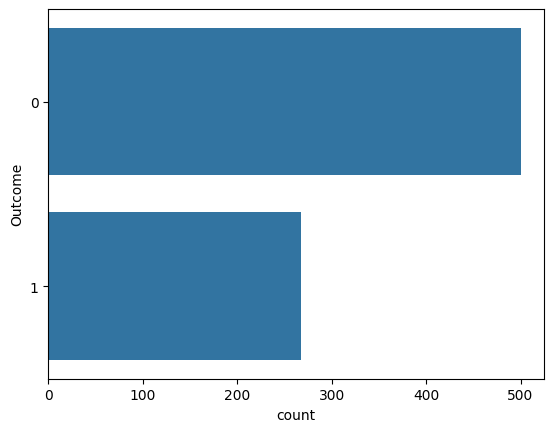

In [32]:
sns.countplot(data=diabet, y="Outcome")

Text(0.5, 0.98, 'Histograms of Pima Indian Diabetes DataSet Feature')

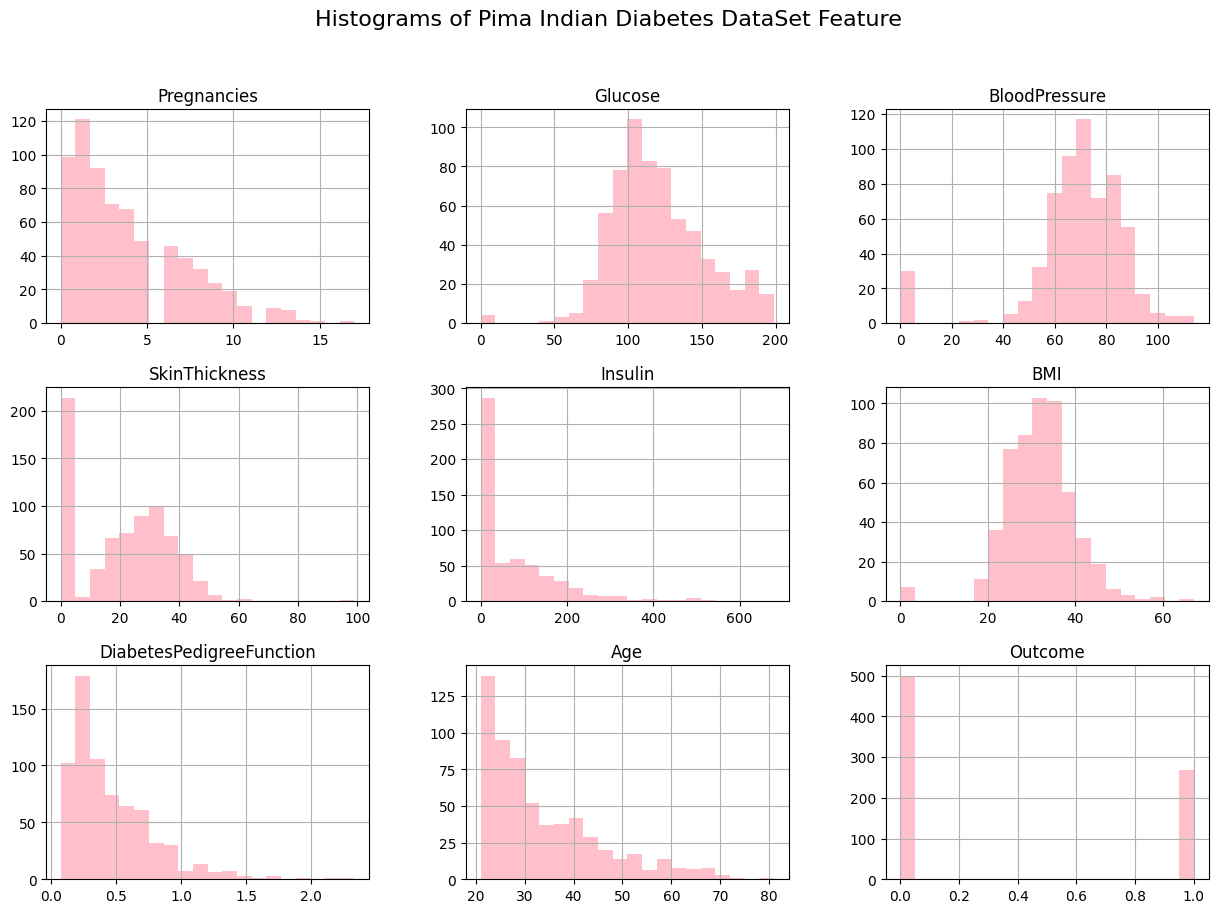

In [37]:
diabet.hist(bins=20, figsize=(15, 10), layout=(3,3),
            color="pink");
plt.suptitle("Histograms of Pima Indian Diabetes DataSet Feature",
             fontsize=16)

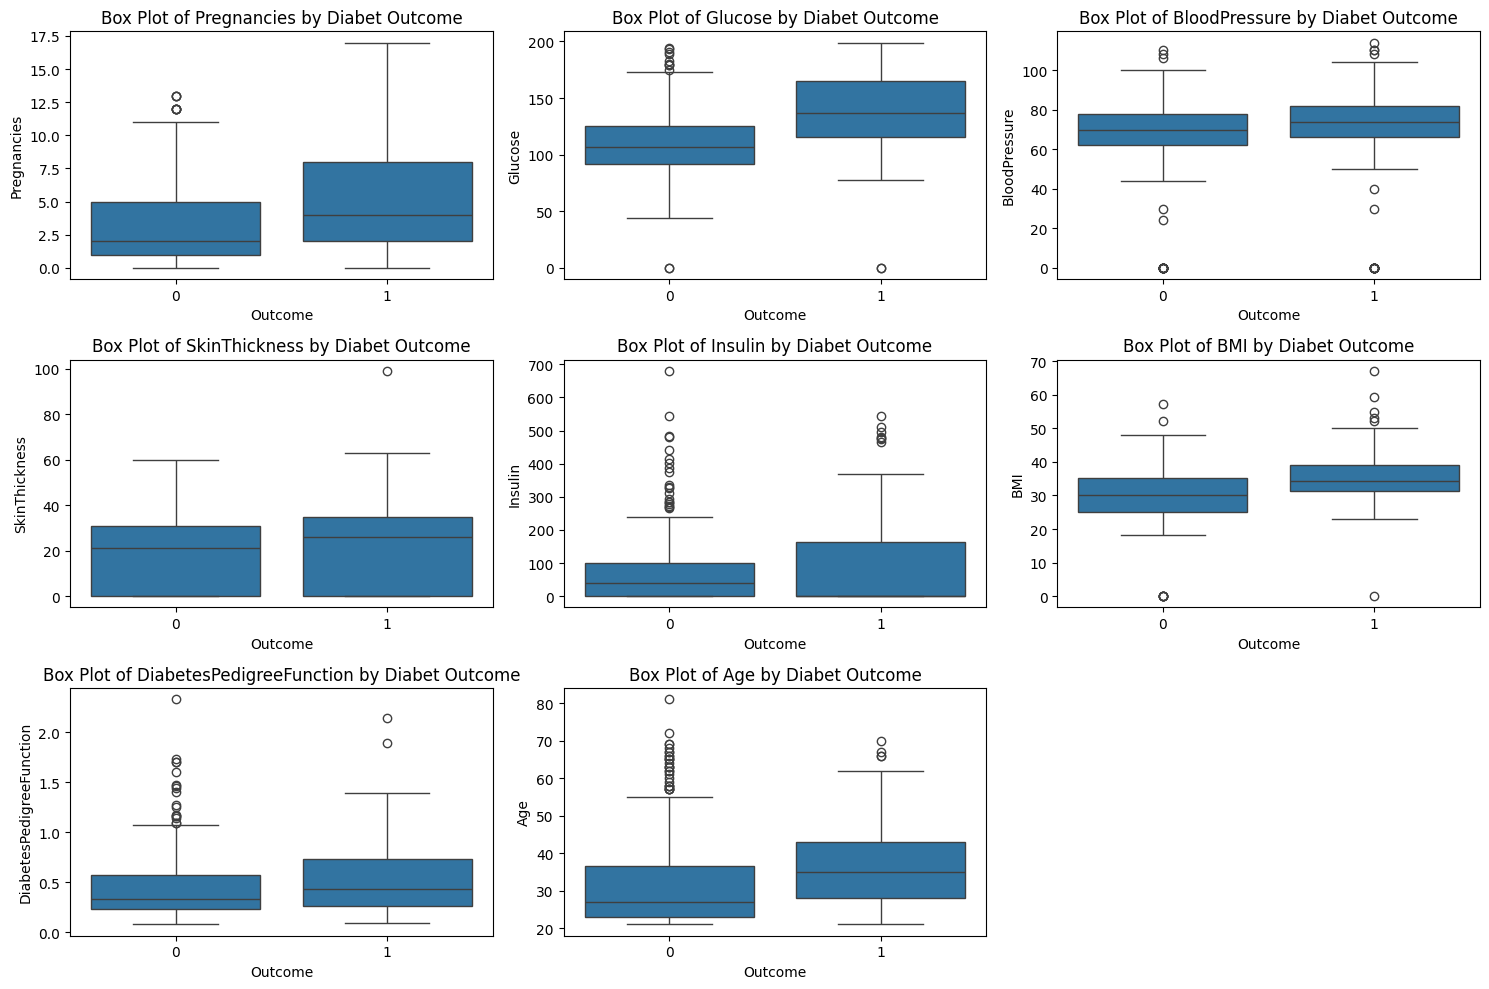

In [45]:
def plot_boxplots(data):
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(data.columns[:-1]):
        plt.subplot(3, 3, i+1)
        sns.boxplot(x="Outcome", y=column, data=diabet)
        plt.title(f"Box Plot of {column} by Diabet Outcome")
    plt.tight_layout()
    plt.show()
    
plot_boxplots(diabet)

<Axes: >

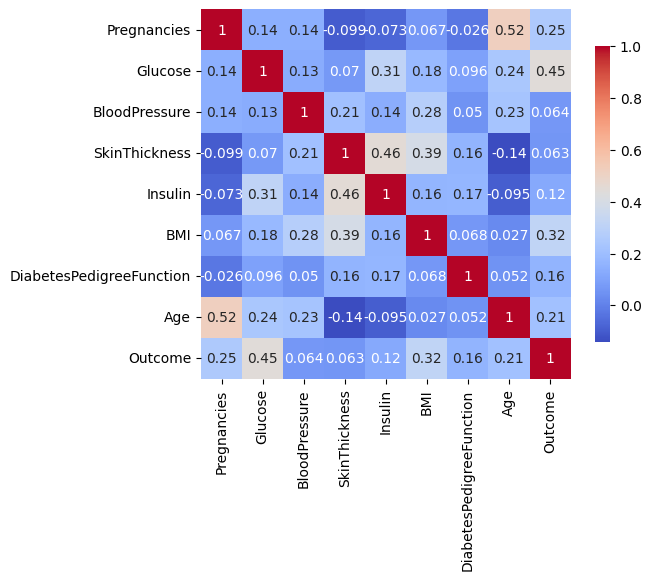

In [46]:
sns.heatmap(diabet.corr(), annot=True, cmap="coolwarm",
            square=True, cbar_kws={"shrink": .8})

In [56]:
food = pd.read_excel("foodreviews.xlsx")
food.head(3)

,ProductID,Helpfulness_Score,Rating,Review_Title,Text
0,CFB001E4K,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,CFB00813G,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,CFB000LQO,1,4,"""Delight"" says it all",This is a confection that has been around a fe...


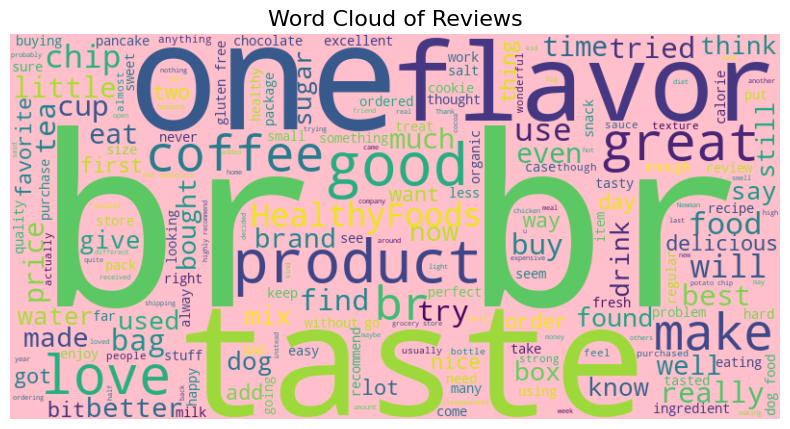

In [65]:
text = " ".join(review for review in food.Text)

def plot_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='pink', colormap='viridis').generate(text)
    
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Reviews', fontsize = 16)
    
plot_wordcloud(text)

In [66]:
imputer = KNNImputer(n_neighbors=5)
diabet = pd.DataFrame(imputer.fit_transform(diabet), columns=diabet.columns)

In [67]:
diabet.isnull(). sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [68]:
x = diabet.drop("Outcome", axis=1)
y = diabet["Outcome"]

In [69]:
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

<Axes: xlabel='count', ylabel='Outcome'>

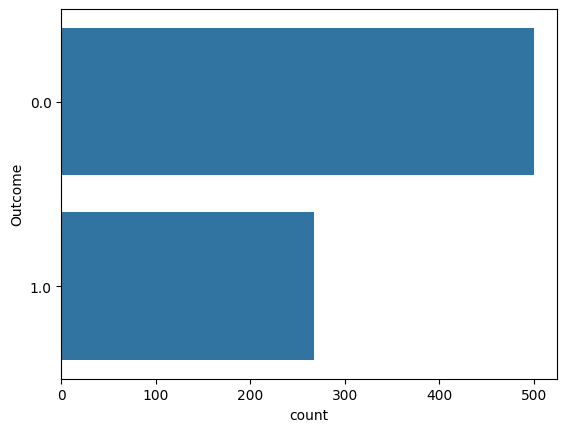

In [70]:
sns.countplot(data=diabet, y=y)

In [72]:
scaler = StandardScaler()
diabet = x_resampled.copy()
diabet[diabet.columns.difference(["Outcome"])] = scaler.fit_transform(diabet[diabet.columns.difference(["Outcome"])])

In [73]:
diabet.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.631558,1.341591,0.161680,0.909160,-0.76215,0.145372,0.509348,0.239937
1,-0.960924,-1.343540,-0.162144,0.525073,-0.76215,0.293760,-0.424792,-0.249485
2,1.268551,1.937542,-0.270085,-1.331350,-0.76215,-1.374123,0.661654,-0.151600
